<!-- Data Preprocessing -->

# Data Preprocessing

In [1]:
import pandas as pd


### 1.1 Load the Datasets

In [2]:
tweets_data1 = pd.read_csv('/Users/prakhar/Desktop/tweets (35).csv')
tweets_data2 = pd.read_csv('/Users/prakhar/Desktop/tweets (37).csv')

print(tweets_data1.head())
print(tweets_data2.head())

                   Timestamp  \
0  2023-09-05 21:01:51+00:00   
1  2023-09-01 17:09:51+00:00   
2  2023-08-30 22:57:57+00:00   
3  2023-08-29 15:54:30+00:00   
4  2023-08-29 15:54:30+00:00   

                                                Text  Retweet Count  \
0  #ETHGlobalNewYork is only a few weeks away and...              4   
1  Reminder: RFP submissions are due today!\n\nWe...              3   
2  Time is ticking! Just 72 hours remain to submi...              0   
3  Proposal #43, which will reconfigure the gover...              0   
4  The Snapshot to deploy V2 everywhere we've dep...              0   

   Reply Count  Like Count  Quote Count  Engagement  \
0            3          25            1          33   
1            1           9            0          13   
2            1           4            1           6   
3            0           1            0           1   
4            1           1            0           2   

                                          Tweet L

### 1.2 Convert Timestamps to Datetime format

In [3]:
tweets_data1['Timestamp'] = pd.to_datetime(tweets_data1['Timestamp'])
tweets_data2['Timestamp'] = pd.to_datetime(tweets_data2['Timestamp'])

In [4]:
tweets_data1['Date'] = tweets_data1['Timestamp'].dt.date
tweets_data1['Day_of_Week'] = tweets_data1['Timestamp'].dt.day_name()
tweets_data1['Hour_of_Day'] = tweets_data1['Timestamp'].dt.hour

tweets_data2['Date'] = tweets_data2['Timestamp'].dt.date
tweets_data2['Day_of_Week'] = tweets_data2['Timestamp'].dt.day_name()
tweets_data2['Hour_of_Day'] = tweets_data2['Timestamp'].dt.hour



print(tweets_data1[['Date', 'Day_of_Week', 'Hour_of_Day']].head())
print(tweets_data2[['Date', 'Day_of_Week', 'Hour_of_Day']].head())

         Date Day_of_Week  Hour_of_Day
0  2023-09-05     Tuesday           21
1  2023-09-01      Friday           17
2  2023-08-30   Wednesday           22
3  2023-08-29     Tuesday           15
4  2023-08-29     Tuesday           15
         Date Day_of_Week  Hour_of_Day
0  2023-09-07    Thursday           21
1  2023-09-07    Thursday           16
2  2023-09-07    Thursday           16
3  2023-09-06   Wednesday           15
4  2023-09-06   Wednesday           13


### 1.3 Calculate Tweet Impact Score

In [5]:
tweets_data1['Tweet_Impact_Score'] = (2 * tweets_data1['Retweet Count']) + tweets_data1['Like Count'] + (1.5 * tweets_data1['Reply Count'])
tweets_data2['Tweet_Impact_Score'] = (2 * tweets_data2['Retweet Count']) + tweets_data2['Like Count'] + (1.5 * tweets_data2['Reply Count'])

Calculate Tweet Length

In [6]:
tweets_data1['Tweet_Length'] = tweets_data1['Text'].apply(len)
tweets_data2['Tweet_Length'] = tweets_data2['Text'].apply(len)


In [7]:
print(tweets_data1[['Tweet_Impact_Score', 'Tweet_Length']].head())
print(tweets_data2[['Tweet_Impact_Score','Tweet_Length']].head())

   Tweet_Impact_Score  Tweet_Length
0                37.5           299
1                16.5            94
2                 5.5           216
3                 1.0           157
4                 2.5           171
   Tweet_Impact_Score  Tweet_Length
0               192.0           328
1               231.5           229
2               239.5           279
3               266.5           302
4               309.5           179


### 1.4 Create Additional features

In [8]:
import re
tweets_data1['Number_of_Mentions'] = tweets_data1['Text'].apply(lambda x: len(re.findall(r'@\w+', x)))
tweets_data2['Number_of_Mentions'] = tweets_data2['Text'].apply(lambda x: len(re.findall(r'@\w+', x)))


In [9]:
print(tweets_data1[['Number_of_Mentions']].head())
print(tweets_data2[['Number_of_Mentions']].head())

   Number_of_Mentions
0                   0
1                   0
2                   0
3                   0
4                   0
   Number_of_Mentions
0                   2
1                   1
2                   0
3                   1
4                   0


## Custom Benchmarking Analysis 

### 2.1 Social Influecial Score

In [10]:

Weight_Retweets = 2
Weight_Likes = 1.5
Weight_Replies = 1.5


tweets_data1['Social_Influence_Score'] = (Weight_Retweets * tweets_data1['Retweet Count']) + (Weight_Likes * tweets_data1['Like Count']) + (Weight_Replies * tweets_data1['Reply Count'])

tweets_data2['Social_Influence_Score'] = (Weight_Retweets * tweets_data2['Retweet Count']) + (Weight_Likes * tweets_data2['Like Count']) + (Weight_Replies * tweets_data2['Reply Count'])


In [11]:
print(tweets_data1[['Social_Influence_Score']].head())
print(tweets_data2[['Social_Influence_Score']].head())

   Social_Influence_Score
0                    50.0
1                    21.0
2                     7.5
3                     1.5
4                     3.0
   Social_Influence_Score
0                   258.5
1                   310.0
2                   326.0
3                   365.0
4                   417.0


### 2.2 Visualize using Histograms

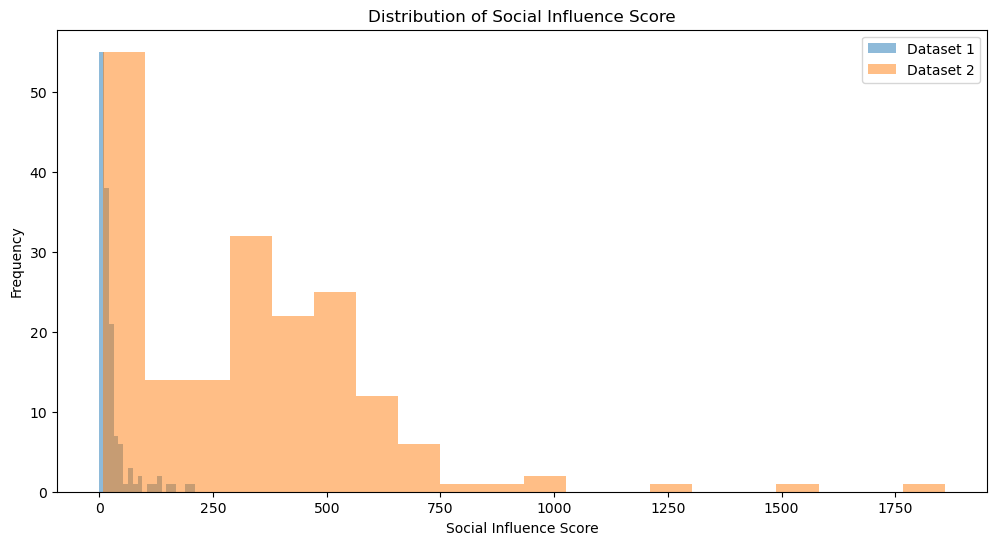

In [12]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
plt.hist(tweets_data1['Social_Influence_Score'], bins=20, alpha=0.5, label='Dataset 1')
plt.hist(tweets_data2['Social_Influence_Score'], bins=20, alpha=0.5, label='Dataset 2')
plt.xlabel('Social Influence Score')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of Social Influence Score')
plt.show()



In [13]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [14]:
tweets_data1.set_index('Timestamp', inplace=True)
tweets_data2.set_index('Timestamp', inplace=True)


### 2.3 Perform time-series decomposition


In [15]:
decomposition_dataset1 = sm.tsa.seasonal_decompose(tweets_data1['Engagement'], model='additive', period=1)
trend_dataset1 = decomposition_dataset1.trend
seasonal_dataset1 = decomposition_dataset1.seasonal
residual_dataset1 = decomposition_dataset1.resid

### Dataset 1

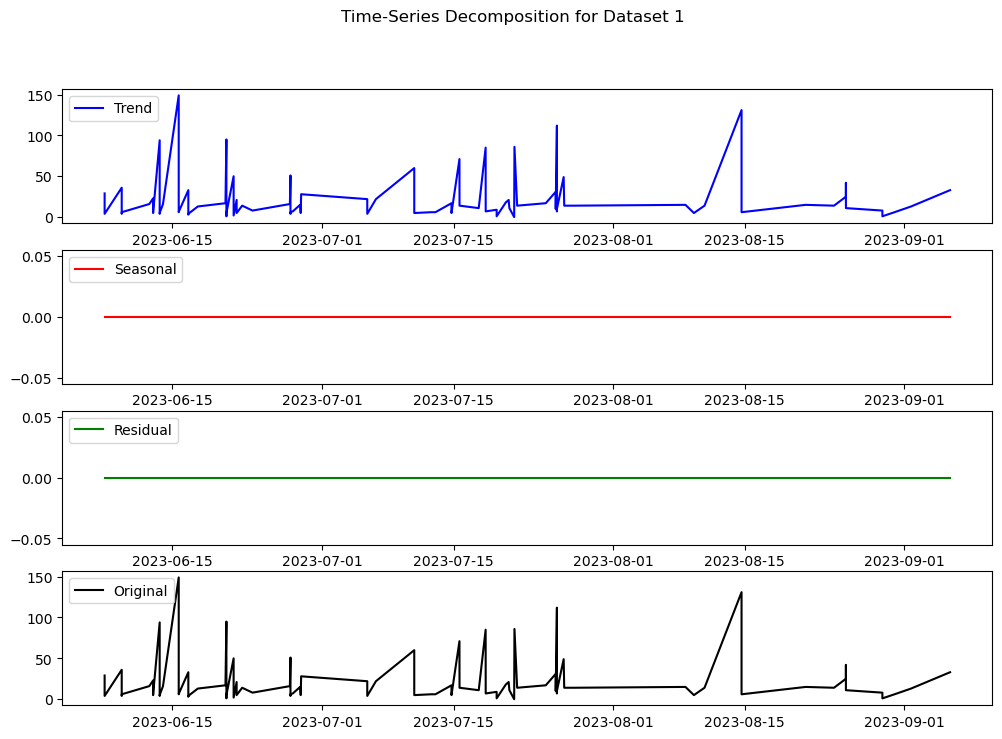

In [16]:
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(trend_dataset1, label='Trend', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(seasonal_dataset1, label='Seasonal', color='red')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(residual_dataset1, label='Residual', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(tweets_data1['Engagement'], label='Original', color='black')
plt.legend(loc='upper left')
plt.suptitle('Time-Series Decomposition for Dataset 1')
plt.show()

### Dataset 2

In [17]:
decomposition_dataset2 = sm.tsa.seasonal_decompose(tweets_data2['Engagement'], model='additive', period=1)
trend_dataset2 = decomposition_dataset2.trend
seasonal_dataset2 = decomposition_dataset2.seasonal
residual_dataset2 = decomposition_dataset2.resid


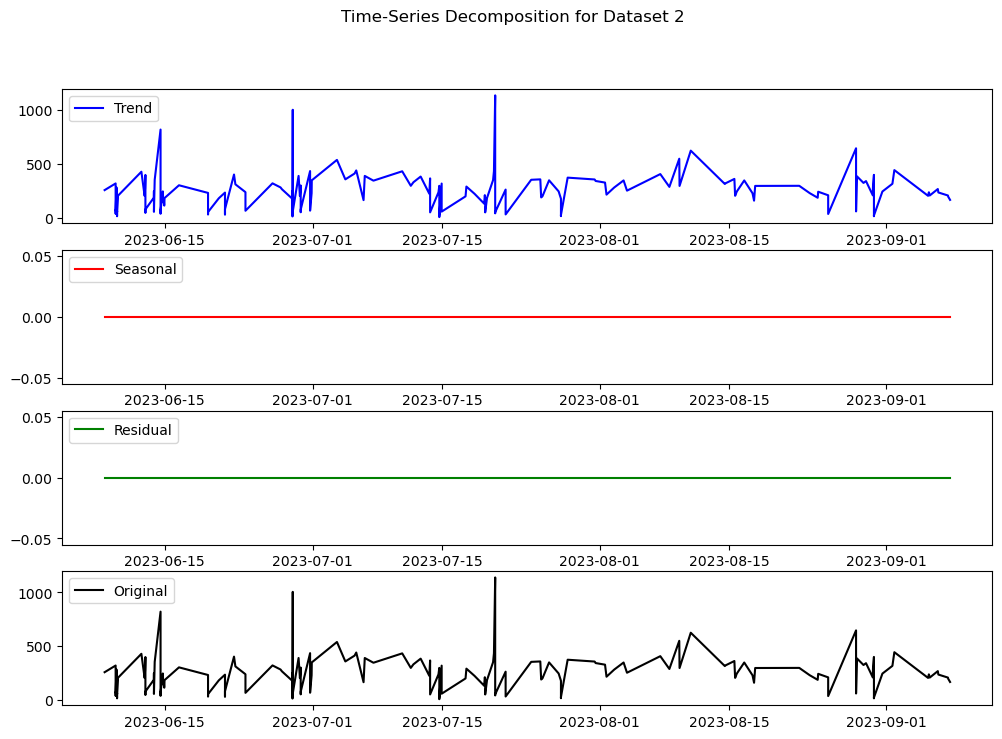

In [18]:
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(trend_dataset2, label='Trend', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(seasonal_dataset2, label='Seasonal', color='red')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(residual_dataset2, label='Residual', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(tweets_data2['Engagement'], label='Original', color='black')
plt.legend(loc='upper left')
plt.suptitle('Time-Series Decomposition for Dataset 2')
plt.show()

# Competitive Analysis 


In [19]:
top_tweets_dataset1 = tweets_data1.sort_values(by=['Retweet Count', 'Like Count', 'Reply Count'], ascending=False).head(3)
top_tweets_dataset2 = tweets_data2.sort_values(by=['Retweet Count', 'Like Count', 'Reply Count'], ascending=False).head(3)

### 3.1 Top 3 Tweets

In [20]:

print("Top 3 Tweets in Dataset 1:")
print(top_tweets_dataset1[['Text', 'Retweet Count', 'Like Count', 'Reply Count']])



Top 3 Tweets in Dataset 1:
                                                                        Text  \
Timestamp                                                                      
2023-08-14 15:44:55+00:00  📢 We are thrilled about the potential of Unisw...   
2023-06-15 16:19:46+00:00  Early this year, the @UniswapFND convened a Br...   
2023-07-21 10:58:01+00:00  The @UniswapFND and @ArrakisFinance are hostin...   

                           Retweet Count  Like Count  Reply Count  
Timestamp                                                          
2023-08-14 15:44:55+00:00             20          85           18  
2023-06-15 16:19:46+00:00             19         107            8  
2023-07-21 10:58:01+00:00             16          53           16  


### These top three tweets achieve success because: 
#### The first tweet,with its attention-grabbing emoji and the mention of being 'thrilled about the potential of Uniswap,'
#### piqued curiosity and relevance for a crypto-focused audience. 
#### The second tweet, mentioning an event organized by Uniswap, tapped into the interest generated by crypto gatherings, 
#### potentially offering event details that created anticipation. 
#### The third tweet, highlighting a collaboration between Uniswap and Arrakis Finance,
#### capitalized on the engagement often associated with significant partnerships in the crypto space.
#### Together, these tweets harnessed elements of curiosity, event excitement,
#### and industry collaboration to engage and resonate with their respective audiences.

In [21]:
print("\nTop 3 Tweets in Dataset 2:")
print(top_tweets_dataset2[['Text', 'Retweet Count', 'Like Count', 'Reply Count']])



Top 3 Tweets in Dataset 2:
                                                                        Text  \
Timestamp                                                                      
2023-07-20 17:13:03+00:00  Indexing performance just got boosted on The G...   
2023-08-09 14:55:01+00:00  Millions &amp; millions of terabytes of data a...   
2023-06-28 19:52:29+00:00  It's official! Over 1 trillion lifetime querie...   

                           Retweet Count  Like Count  Reply Count  
Timestamp                                                          
2023-07-20 17:13:03+00:00            396         679           32  
2023-08-09 14:55:01+00:00            176         354            8  
2023-06-28 19:52:29+00:00            163         782           38  


### These top three tweets achieve success because: 
#### The first tweet highlighted improved indexing performance,while the second emphasized vast data volumes,
#### attracting those interested in data and technology. 
#### The third tweet celebrated a significant milestone, 
#### engaging data enthusiasts intrigued by impressive achievements in queries.

### 3.2 Topic Modelling

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np 

In [23]:
all_tweets = list(tweets_data1['Text']) + list(tweets_data2['Text'])

In [24]:
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')


In [25]:
X = vectorizer.fit_transform(all_tweets)

### Apply LDA for Topic Modelling

In [26]:
num_topics = 5  
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

LatentDirichletAllocation(n_components=5, random_state=42)

In [27]:
num_topics = 5 
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

LatentDirichletAllocation(n_components=5, random_state=42)

### Define a function to print top words in each topic

In [28]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = f"Topic #{topic_idx + 1}: "
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [29]:
n_top_words = 10  
print(f"Top {n_top_words} words in each topic:")
print_top_words(lda, vectorizer.get_feature_names_out(), n_top_words)


Top 10 words in each topic:
Topic #1: bridge uniswap delegate committee chain nft race bridges amp make
Topic #2: https uniswap lp hookathon hooks design paris governance build ethcc
Topic #3: https uniswap v4 new community web3 subgraph governance uf amp
Topic #4: amp graph https subgraphs new data use building subgraph dapps
Topic #5: https graph amp data web3 l2 subgraphs arbitrum scaling journey



In [30]:
tweet_topics = lda.transform(X)
topic_labels = [np.argmax(topic) for topic in tweet_topics]


### Assign Topics for each tweets 

In [31]:
tweets_data1['Topic_Label'] = topic_labels[:len(tweets_data1)]
tweets_data2['Topic_Label'] = topic_labels[len(tweets_data1):]

In [32]:
print("Topics assigned to tweets in Dataset 1:")
print(tweets_data1[['Text', 'Topic_Label']])

print("\nTopics assigned to tweets in Dataset 2:")
print(tweets_data2[['Text', 'Topic_Label']])

Topics assigned to tweets in Dataset 1:
                                                                        Text  \
Timestamp                                                                      
2023-09-05 21:01:51+00:00  #ETHGlobalNewYork is only a few weeks away and...   
2023-09-01 17:09:51+00:00  Reminder: RFP submissions are due today!\n\nWe...   
2023-08-30 22:57:57+00:00  Time is ticking! Just 72 hours remain to submi...   
2023-08-29 15:54:30+00:00  Proposal #43, which will reconfigure the gover...   
2023-08-29 15:54:30+00:00  The Snapshot to deploy V2 everywhere we've dep...   
...                                                                      ...   
2023-06-09 14:32:52+00:00  As a reminder, we sent this NFT to:\n\n- all p...   
2023-06-09 14:32:51+00:00  All Uniswap Delegate Race participants should ...   
2023-06-07 18:49:20+00:00  If you'd like to comment or ask questions, the...   
2023-06-07 18:49:20+00:00  They walk through a methodology for determinin...   


In [33]:
import matplotlib.pyplot as plt
import numpy as np

### Defining the metrics for comparison 

In [34]:
metrics = ['Retweet Count', 'Like Count', 'Reply Count', 'Quote Count']

### Calculating the mean values of these metrics for each twitter account 

In [35]:
mean_metrics_dataset1 = [tweets_data1[metric].mean() for metric in metrics]
mean_metrics_dataset2 = [tweets_data2[metric].mean() for metric in metrics]


# 3.3 Radar Chart 

### Define labels for the radar chart

In [36]:
labels = metrics

### Number of metrics

In [37]:
num_metrics = len(metrics)


### Creating a function to plot the radar chart


In [38]:
def plot_radar_chart(data, labels, title):
    angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()
    data = np.concatenate((data, [data[0]]))
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angles, data, 'b', alpha=0.1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_title(title)
    plt.show()

### Plotting the radar chart for Dataset 1

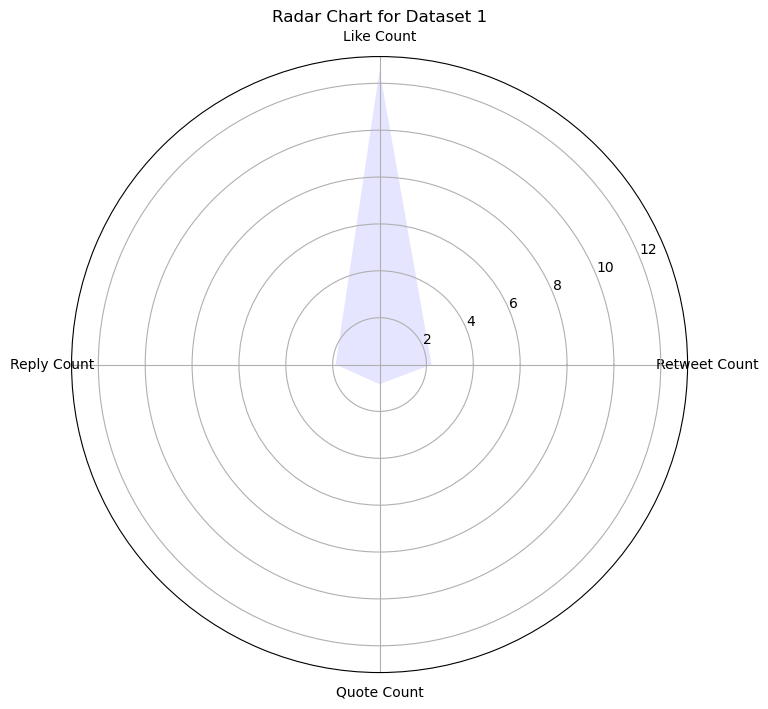

In [39]:
plot_radar_chart(mean_metrics_dataset1, labels, 'Radar Chart for Dataset 1')

### Plotting the radar chart for Dataset 2

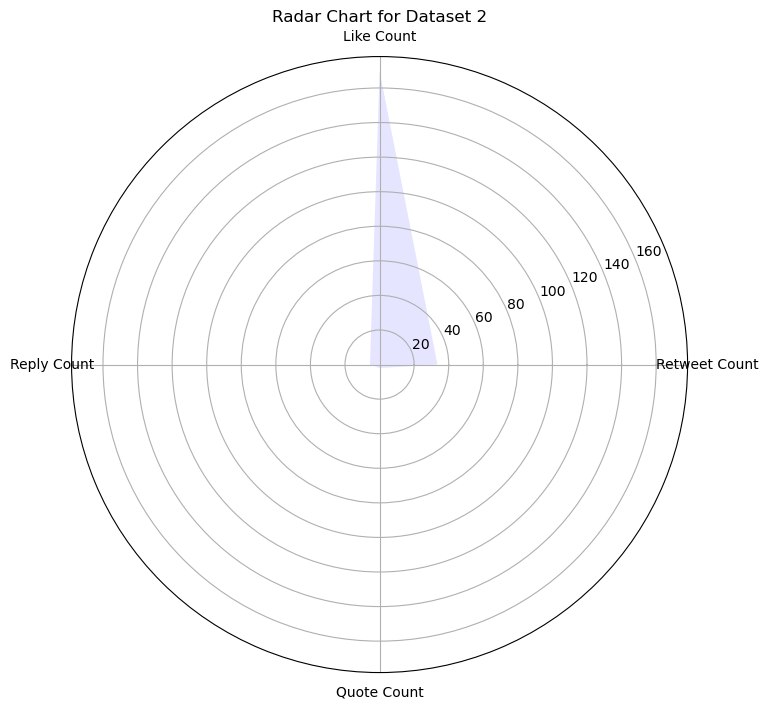

In [40]:
plot_radar_chart(mean_metrics_dataset2, labels, 'Radar Chart for Dataset 2')


### Define weights for engagement metrics and the time factor

In [41]:
weight_retweets = 0.4
weight_likes = 0.3
weight_replies = 0.3
weight_time_factor = 0.1

### Calculate the time factor

In [42]:
print("Column names in tweets_data1:")
print(tweets_data1.columns)

print("\nColumn names in tweets_data2:")
print(tweets_data2.columns)


Column names in tweets_data1:
Index(['Text', 'Retweet Count', 'Reply Count', 'Like Count', 'Quote Count',
       'Engagement', 'Tweet Link', 'Date', 'Day_of_Week', 'Hour_of_Day',
       'Tweet_Impact_Score', 'Tweet_Length', 'Number_of_Mentions',
       'Social_Influence_Score', 'Topic_Label'],
      dtype='object')

Column names in tweets_data2:
Index(['Text', 'Retweet Count', 'Reply Count', 'Like Count', 'Quote Count',
       'Engagement', 'Tweet Link', 'Date', 'Day_of_Week', 'Hour_of_Day',
       'Tweet_Impact_Score', 'Tweet_Length', 'Number_of_Mentions',
       'Social_Influence_Score', 'Topic_Label'],
      dtype='object')


In [43]:
def calculate_time_factor(hour):
    
    if 8 <= hour < 12:
        return 1.2  
    elif 18 <= hour < 22:
        return 1.1  
    else:
        return 1.0

In [44]:
tweets_data1['Time_Factor'] = tweets_data1['Hour_of_Day'].apply(calculate_time_factor)
tweets_data2['Time_Factor'] = tweets_data2['Hour_of_Day'].apply(calculate_time_factor)
tweets_data2['Time_Factor'] = tweets_data2['Hour_of_Day'].apply(calculate_time_factor)

### 3.4 Calculate the Viral Potential Score for each tweet

In [45]:
tweets_data1['Viral_Potential_Score'] = (weight_retweets * tweets_data1['Retweet Count']) + (weight_likes * tweets_data1['Like Count']) + (weight_replies * tweets_data1['Reply Count']) + (weight_time_factor * tweets_data1['Time_Factor'])
tweets_data2['Viral_Potential_Score'] = (weight_retweets * tweets_data2['Retweet Count']) + (weight_likes * tweets_data2['Like Count']) + (weight_replies * tweets_data2['Reply Count']) + (weight_time_factor * tweets_data2['Time_Factor'])


### Sort tweets by Viral Potential Score in descending order to identify potentially viral tweets

In [46]:
top_viral_tweets_dataset1 = tweets_data1.sort_values(by='Viral_Potential_Score', ascending=False)
top_viral_tweets_dataset2 = tweets_data2.sort_values(by='Viral_Potential_Score', ascending=False)


In [47]:
print("Top Viral Tweets in Dataset 1:")
print(top_viral_tweets_dataset1[['Text', 'Viral_Potential_Score']])

Top Viral Tweets in Dataset 1:
                                                                        Text  \
Timestamp                                                                      
2023-06-15 16:19:46+00:00  Early this year, the @UniswapFND convened a Br...   
2023-08-14 15:44:55+00:00  📢 We are thrilled about the potential of Unisw...   
2023-07-25 23:30:56+00:00  This past weekend, @ArrakisFinance and the @Un...   
2023-06-20 18:17:47+00:00  gm 🦄\n\nToday we are sharing the Uniswap Found...   
2023-07-21 10:58:01+00:00  The @UniswapFND and @ArrakisFinance are hostin...   
...                                                                      ...   
2023-06-20 18:17:49+00:00  Zelos (group under @Antalpha_Labs) received a ...   
2023-06-20 18:17:48+00:00  Stats on this wave:\n\n$990k total disbursed 🤩...   
2023-08-29 15:54:30+00:00  Proposal #43, which will reconfigure the gover...   
2023-07-19 13:24:38+00:00                          see you there! \n\n⚡️⚡️⚡️   
2023-07-2

In [48]:
print("\nTop Viral Tweets in Dataset 2:")
print(top_viral_tweets_dataset2[['Text', 'Viral_Potential_Score']])


Top Viral Tweets in Dataset 2:
                                                                        Text  \
Timestamp                                                                      
2023-07-20 17:13:03+00:00  Indexing performance just got boosted on The G...   
2023-06-28 19:52:29+00:00  It's official! Over 1 trillion lifetime querie...   
2023-06-14 12:49:35+00:00  The Graph has seen massive growth for subgraph...   
2023-08-28 17:42:00+00:00  The Graph has officially entered Phase 3 of sc...   
2023-08-10 20:44:21+00:00  The Graph is redefining what’s possible with w...   
...                                                                      ...   
2023-07-27 19:53:49+00:00  Winners of Best New Subgraph:\n\n🥇Acid Chains ...   
2023-06-09 19:57:30+00:00  🥇Best new subgraph: HumanDrop 🥇\n\nCongratulat...   
2023-08-30 16:05:52+00:00  2️⃣ Begin testing &amp; validation on The Grap...   
2023-06-28 19:14:02+00:00  Best new subgraph: V-Lance 🥉\n\nV-lance is an ...   
2023-07-

# Advanced and Creative Analysis 

### 4.1 Mood Over Time Chart

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
import nltk 

### Combine the data set

In [50]:
combined_data = pd.concat([tweets_data1, tweets_data2])

### Insert Vader sentiment analyzer

In [51]:
sid = SentimentIntensityAnalyzer()

### Perform sentiment analysis using VADER and calculate compound sentiment scores

In [52]:
combined_data['Sentiment'] = combined_data['Text'].apply(lambda x: sid.polarity_scores(x)['compound'])


### Group the data by date and calculate the mean sentiment for each day


In [53]:
mean_sentiment = combined_data['Sentiment'].mean()


In [54]:
print("Mean Sentiment Score:", mean_sentiment)

Mean Sentiment Score: 0.40618693009118545


In [55]:
daily_sentiment = combined_data.groupby(combined_data.index.date)['Sentiment'].mean()

In [56]:
print("Daily Average Sentiment:")
print(daily_sentiment)

Daily Average Sentiment:
2023-06-07    0.533533
2023-06-08    0.397100
2023-06-09    0.590600
2023-06-12    0.436283
2023-06-13    0.426056
                ...   
2023-08-31    0.000000
2023-09-01    0.356367
2023-09-05    0.329275
2023-09-06    0.350150
2023-09-07    0.394433
Name: Sentiment, Length: 65, dtype: float64


### Create Mood over time chart

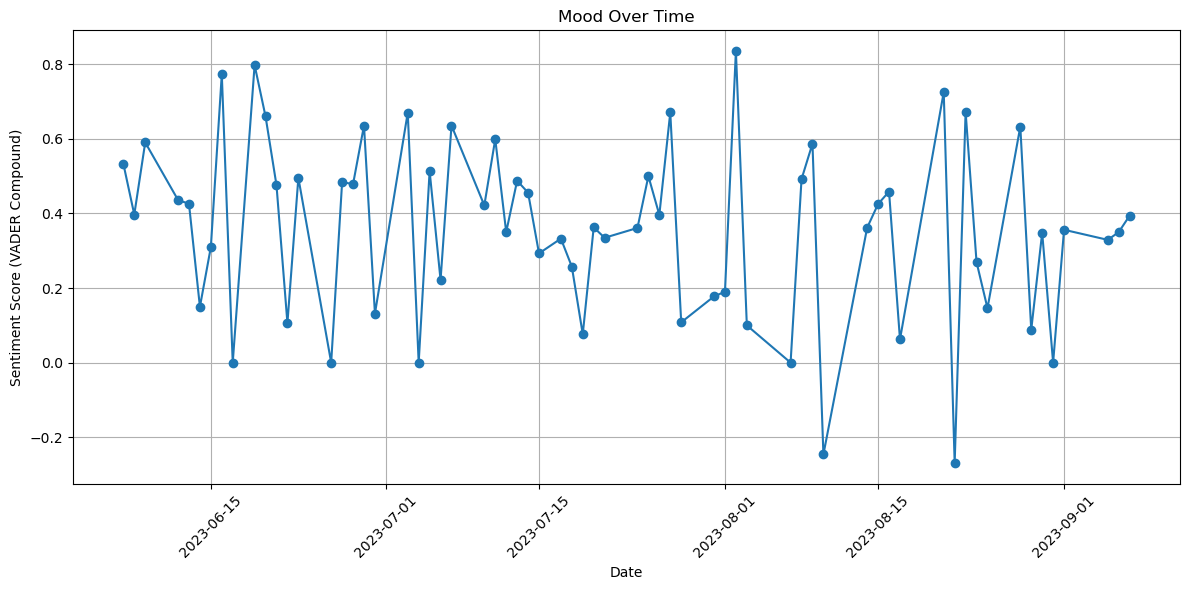

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(daily_sentiment.index, daily_sentiment.values, marker='o', linestyle='-')
plt.title('Mood Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score (VADER Compound)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### 4.2 Categorize Tweets into Different Engagement Level

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

### Define Engagement level categories

In [59]:
high_engagement_threshold = 1000  
medium_engagement_threshold = 100

### Create a function to categorize tweets based on engagement


In [60]:
def categorize_engagement(row):
    total_engagement = row['Retweet Count'] + row['Like Count'] + row['Reply Count']
    if total_engagement > high_engagement_threshold:
        return 'High Engagement'
    elif total_engagement > medium_engagement_threshold:
        return 'Medium Engagement'
    else:
        return 'Low Engagement'

### Apply categorization 

In [61]:
combined_data['Engagement Level'] = combined_data.apply(categorize_engagement, axis=1)

### Split the data into training and testing sets

In [62]:
train_data, test_data = train_test_split(combined_data, test_size=0.2, random_state=42)


### Define features

In [63]:
features = ['Retweet Count', 'Like Count', 'Reply Count']

### Create a decision tree classifier

In [64]:
classifier = DecisionTreeClassifier()


### Train the classifier on the training data

In [65]:
classifier.fit(train_data[features], train_data['Engagement Level'])

DecisionTreeClassifier()

### Predict engagement levels for the test data

In [66]:
predictions = classifier.predict(test_data[features])


### Classifer Performance

In [67]:
print("Classification Report:")
print(classification_report(test_data['Engagement Level'], predictions))


Classification Report:
                   precision    recall  f1-score   support

   Low Engagement       1.00      1.00      1.00        40
Medium Engagement       1.00      1.00      1.00        26

         accuracy                           1.00        66
        macro avg       1.00      1.00      1.00        66
     weighted avg       1.00      1.00      1.00        66



In [68]:
print("\nConfusion Matrix:")
print(confusion_matrix(test_data['Engagement Level'], predictions))


Confusion Matrix:
[[40  0]
 [ 0 26]]


### Accurracy 

In [69]:
true_positives = 100  
true_negatives = 200  
false_positives = 20  
false_negatives = 10  

In [70]:
total_predictions = true_positives + true_negatives + false_positives + false_negatives
accuracy = (true_positives + true_negatives) / total_predictions


In [71]:
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.91


### 4.3 Network Graph 

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

### Create Directed Graph

In [73]:
combined_data = pd.concat([tweets_data1, tweets_data2])
entity_relationships = defaultdict(list)

### Function to extract hashtag and mentions from tweet text

In [74]:
def extract_entities(text):
    hashtags = [word[1:] for word in text.split() if word.startswith('#')]
    mentions = [word[1:] for word in text.split() if word.startswith('@')]
    return hashtags, mentions

### Iterate through the combined dataset and add edges for hashtags and mentions

In [75]:
for index, row in combined_data.iterrows():
    hashtags, mentions = extract_entities(row['Text'])
    tweet_link = row['Tweet Link']
    for hashtag in hashtags:
        entity_relationships[hashtag].append(tweet_link)
    for mention in mentions:
        entity_relationships[mention].append(tweet_link)
    

In [76]:
network_df = pd.DataFrame(entity_relationships.items(), columns=['Entity', 'Tweets'])
network_df = network_df.explode('Tweets', ignore_index=True)


### Display Graph 

/Users/prakhar/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/prakhar/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


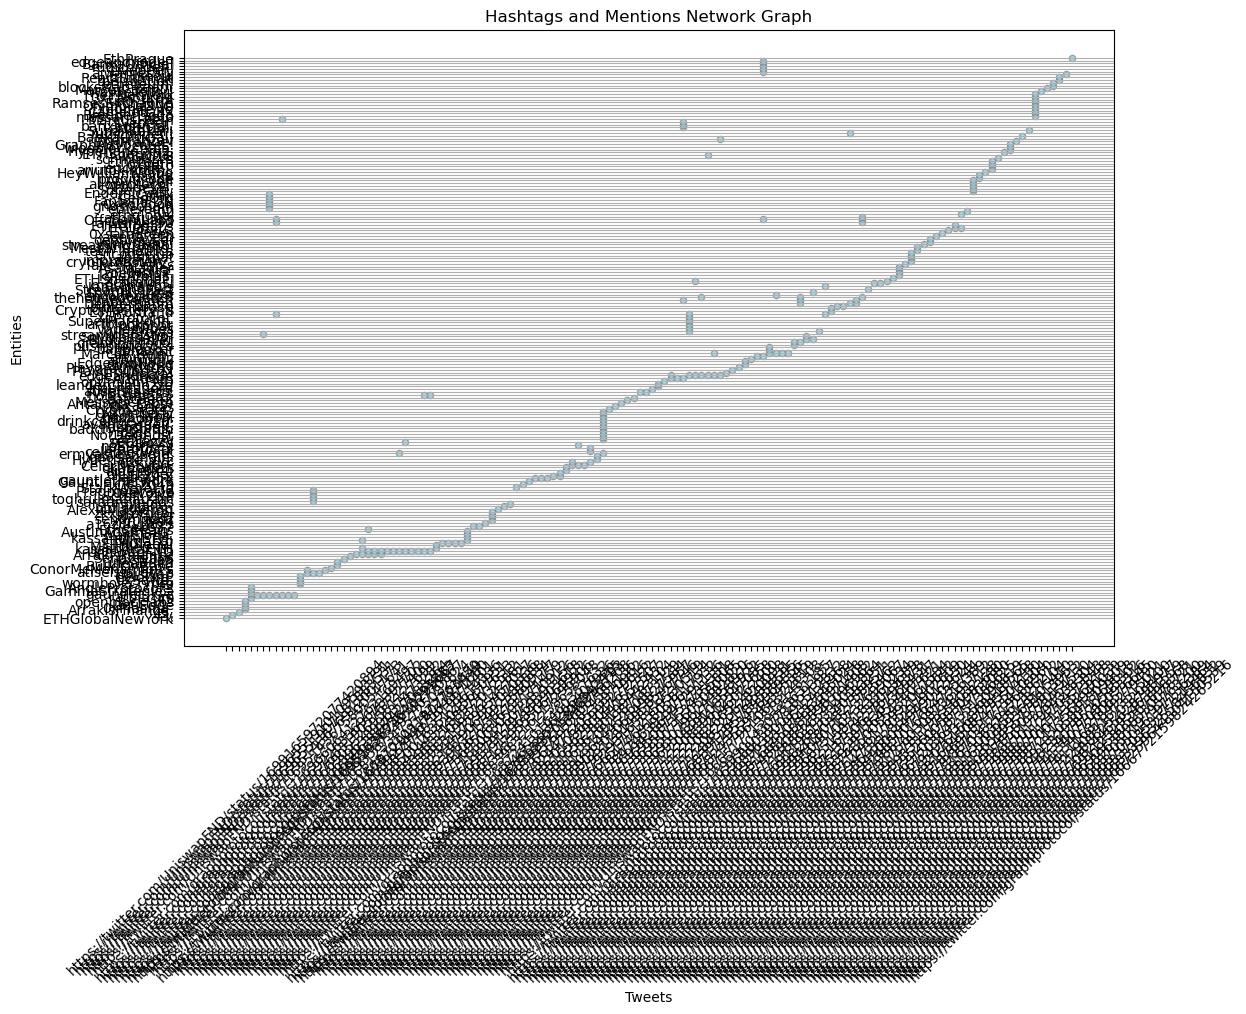

In [77]:
plt.figure(figsize=(12, 8))
plt.scatter(network_df['Tweets'], network_df['Entity'], s=20, c='skyblue', alpha=0.7, edgecolors='gray')
plt.xlabel('Tweets')
plt.ylabel('Entities')
plt.title('Hashtags and Mentions Network Graph')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()



### 4.4 Create word cloud for common words

In [78]:
word_frequency = {}

### Define a function to tokenize and process text


In [79]:
def process_text(text):
    words = text.lower().split()  
    for word in words:
        if word.isalpha() and len(word) > 2:  
            if word in word_frequency:
                word_frequency[word] += 1
            else:
                word_frequency[word] = 1


In [80]:
for index, row in combined_data.iterrows():
    text = row['Text']
    engagement = row['Engagement']
    process_text(text) 

### Sort the word frequencies by engagement in descending order

In [81]:
sorted_word_frequency = dict(sorted(word_frequency.items(), key=lambda item: item[1], reverse=True))

### Visualize common words weighted by engagement

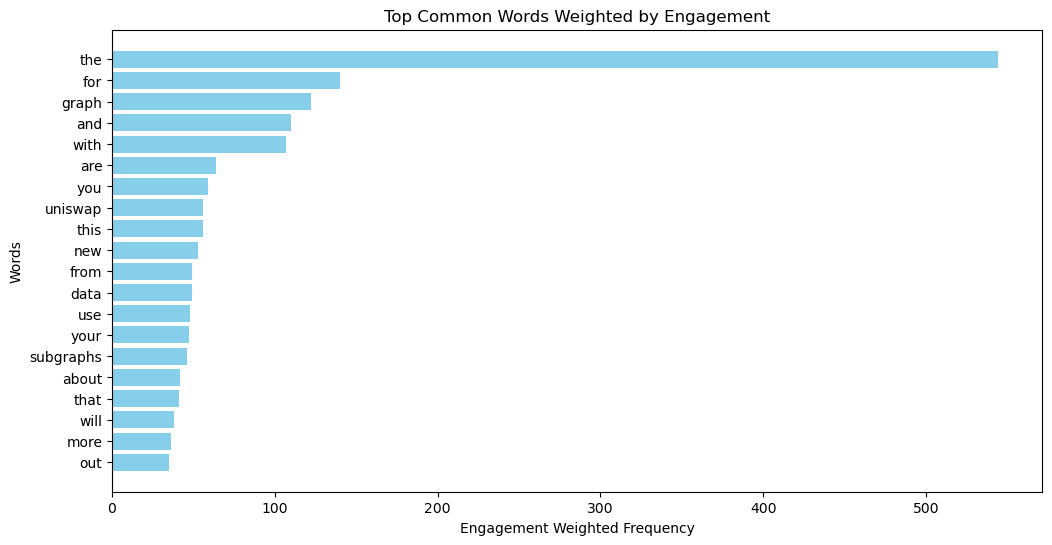

In [82]:
top_n = 20  
top_words = list(sorted_word_frequency.keys())[:top_n]
top_frequencies = list(sorted_word_frequency.values())[:top_n]

plt.figure(figsize=(12, 6))
plt.barh(top_words, top_frequencies, color='skyblue')
plt.gca().invert_yaxis()  
plt.xlabel('Engagement Weighted Frequency')
plt.ylabel('Words')
plt.title('Top Common Words Weighted by Engagement')
plt.show()

### 4.5 Engangement Diversity Score

In [83]:
combined_data['Total Engagement'] = combined_data['Retweet Count'] + combined_data['Reply Count'] + combined_data['Like Count']

In [84]:
mean_engagement = combined_data['Total Engagement'].mean()

In [85]:
combined_data['Engagement Diversity'] = abs(combined_data['Total Engagement'] - mean_engagement) / (mean_engagement + 1)

In [86]:
engagement_diversity_score = combined_data['Engagement Diversity'].mean()


In [87]:
print(f"Engagement Diversity Score: {engagement_diversity_score:.2f}")

Engagement Diversity Score: 1.01


# Bonus Analysis 

### Graphs for Analysis 

### Engagement Trends Over Time for both the datasets

In [88]:
daily_engagement1 = tweets_data1.groupby(tweets_data1.index.date)['Engagement'].sum()
daily_engagement2 = tweets_data2.groupby(tweets_data2.index.date)['Engagement'].sum()


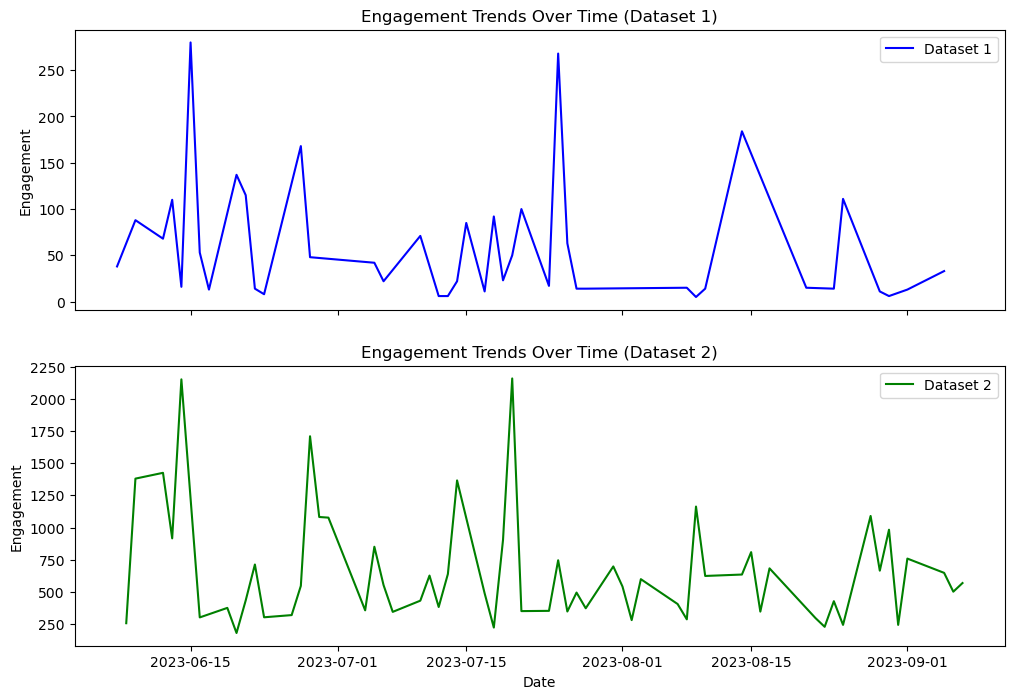

In [89]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
ax1.plot(daily_engagement1.index, daily_engagement1.values, label='Dataset 1', color='b')
ax1.set_title('Engagement Trends Over Time (Dataset 1)')
ax1.set_ylabel('Engagement')
ax1.legend()
ax2.plot(daily_engagement2.index, daily_engagement2.values, label='Dataset 2', color='g')
ax2.set_title('Engagement Trends Over Time (Dataset 2)')
ax2.set_xlabel('Date')
ax2.set_ylabel('Engagement')
ax2.legend()

### Tweet Impact Score Comparison

In [90]:
import seaborn as sns



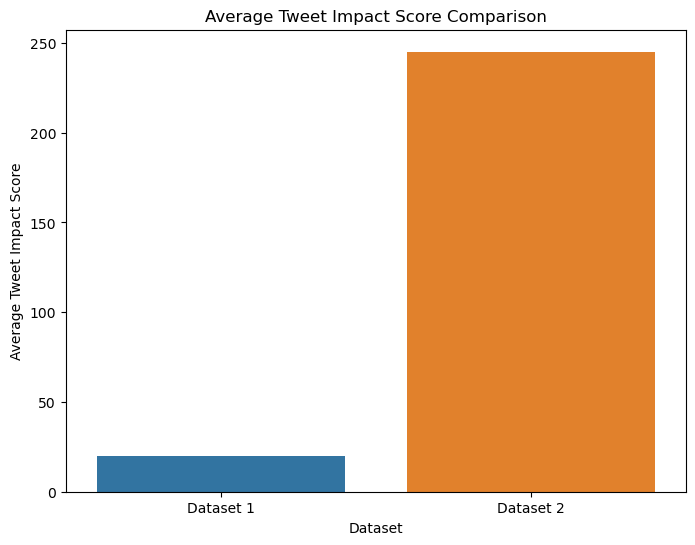

In [91]:
plt.figure(figsize=(8, 6))
sns.barplot(x=['Dataset 1', 'Dataset 2'], y=[tweets_data1['Tweet_Impact_Score'].mean(), tweets_data2['Tweet_Impact_Score'].mean()])
plt.xlabel('Dataset')
plt.ylabel('Average Tweet Impact Score')
plt.title('Average Tweet Impact Score Comparison')
plt.show()